In [2]:
from AG_simple import AlgoritmoGenetico
from sumolib import checkBinary
import xml.etree.ElementTree as ET
import traci
import sys

from statistics import mean, stdev
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def simulate(program):
    traci.start([checkBinary(program), "-c", "sumo/light.sumocfg", "--tripinfo-output", "sumo/tripinfo.xml"])
    
    while traci.simulation.getMinExpectedNumber() > 0:
        traci.simulationStep()
        
    traci.close()
    sys.stdout.flush()
    
    xmldoc = ET.parse('sumo/tripinfo.xml')

    tripinfos = xmldoc.findall('tripinfo')

    waitingTime = 0
    for tripinfo in tripinfos:
        waitingTime += float(tripinfo.get('waitingTime'))
        
    return waitingTime

In [4]:
def display(fenotipo):
    red = ET.parse('sumo/light.net.xml')
    signal = red.find('tlLogic')
    fases = signal.findall('phase')
    
    for i in range(4):
        fases[i].set("duration", str(fenotipo[2*i]))
        fases[i].set("state", fenotipo[2*i+1])

    red.write("sumo/light.net.xml")

    return simulate('sumo-gui')

In [5]:
prueba = [30, 'GGGGgrrrrrGGGGgrrrrr', 5, 'yyyyyrrrrryyyyyrrrrr', 30, 'rrrrrGGGGgrrrrrGGGGg', 5, 'rrrrryyyyyrrrrryyyyy']
display(prueba)

322.79999999999995

In [26]:
data = [0] * 188
ga = AlgoritmoGenetico(data)
ga.generations =  20
ga.population_size = 50
ga.crossover_probability = 0.9
ga.mutation_probability = 0.1
fitnesses = []

In [27]:
def fenotipo(genotipo):
    
    fenotipo = []
    m = ['G', 'g', 'y', 'r']
    
    for j in range(4):
        fenotipo.append(int(''.join(map(str,genotipo[:7])),2)) 

        state = genotipo[7:47]
        s = ""
        for i in range(0, 20):
            s += m[int(str(state[2*i])+str(state[2*i+1]),2)]
        fenotipo.append(s)

        genotipo = genotipo[47:]
    
    return fenotipo

In [28]:
def fitness(individual, data):
    
    individual = fenotipo(individual)

    red = ET.parse('sumo/light.net.xml')
    signal = red.find('tlLogic') 
    
    i = 0
    for phase in signal.iter('phase'):
        duration = str(individual[2*i])
        if duration == "0":
             return 0
        state = individual[2*i+1]
        phase.set("duration", duration)
        phase.set("state", state)
        i += 1

    red.write("sumo/light.net.xml")
    
    waitingTime = simulate('sumo')
    
    fitnesses.append(waitingTime)
          
    print(waitingTime, individual)
    
    return 1/waitingTime

ga.fitness_function = fitness

In [29]:
ga.run()

760.1999999999999 [33, 'ggGgggrGGrGyyygGGGyG', 118, 'GGGyygyGrGgGGryygyGg', 30, 'ggGggyggyyrrggyyGggy', 54, 'yGrGyyGrgGyggrgryrgy']
463.79999999999995 [25, 'ggggggggrrgyrygrgryG', 11, 'rgygGygGGgGyyryyGGry', 106, 'gGggGryyGgGgrGGGrgrr', 106, 'GrrggyyGgyygyGryrgry']
603.2 [38, 'gGrGryGGryggggrgGryy', 20, 'GyGyyyGGrgyGyrggGGgy', 99, 'grgryGGrgyGryggrgrrr', 2, 'rGGggryrryggyggyrGGy']
4524.799999999999 [96, 'ryrrryGGggyrrGGyrgGy', 110, 'rGGggGggGGygGrryygrG', 122, 'yyyGyGrGgGyGrGGGgyGy', 88, 'yrgrygygGrrGGrrGGrry']
591.5 [118, 'yyGgyGgyygGgyrGgrgyG', 74, 'rrygGGgyryryGGryGygg', 58, 'ggrgyrrGrgrrgGGgGygy', 60, 'GgggyryGyrggyyggyyGg']
400.7 [102, 'rrgGgGGGGygGGGGgGgrr', 8, 'ygryGrGyGGrygygrgrGg', 11, 'ggGgGyrgggygyGryGyGy', 111, 'ggGGyyryyrGGgrGGGyGg']
2860.2 [18, 'GygyyGygyggggrGyrgGy', 76, 'yryggrGrgrgGGgryGygG', 51, 'yyrrrrGryygryGrrGrGG', 49, 'yrygrrryyygGyrGyrrGg']
1310.8999999999999 [78, 'GygGyryryryrGGgGGGyG', 9, 'ryGGgGgyrrryrgrGGggy', 90, 'ygrggGGGGygyggygrgGr', 74, 'rGryyryGgGgyrrG

In [30]:
best = fenotipo(ga.best_individual()[1])

[282.80000000000007, 97.10000000000002, 70.8, 70.8, 70.8, 70.8, 70.8, 70.8, 70.8, 68.4, 68.1, 68.1, 28.9, 28.9, 24.4, 18.8, 18.8, 18.8, 18.8, 18.8]
[1676.296, 513.298, 374.498, 156.81, 71.102, 72.682, 73.064, 70.8, 75.34, 70.648, 69.922, 69.244, 82.002, 59.76, 35.772, 27.325999999999997, 22.608, 19.024, 18.8, 18.8]
[1426.3543422935243, 358.70640344642493, 309.55817987999, 179.75550770705306, 2.1354624791833725, 13.307749621930826, 16.008897526063436, 0.0, 26.105437700812843, 0.6792072209418797, 1.1471864428652712, 5.2114927940904945, 84.12184673412243, 16.676330531624753, 16.016267750417423, 2.6472789264234535, 2.6387876003953017, 1.108512516844081, 0.0, 0.0]


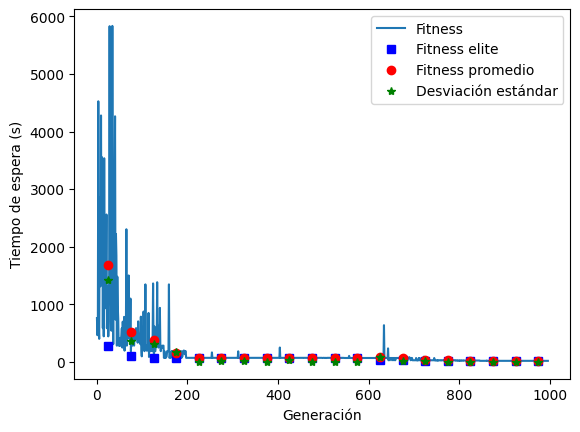

In [31]:
fit_generacion = []
fit_elite = []
fit_promedio = []
fit_desviacion = []

for i in range(ga.generations):
    fit_generacion.append(fitnesses[ga.population_size*i:(ga.population_size)*(i+1)])

for i in range(ga.generations):
    fit_elite.append(min(fit_generacion[i]))
    fit_promedio.append(mean(fit_generacion[i]))
    fit_desviacion.append(stdev(fit_generacion[i]))
    
print(fit_elite)
print(fit_promedio)
print(fit_desviacion)


plt.plot(fitnesses, label='Fitness')
t = np.linspace(ga.population_size/2, (ga.population_size/2)*(2*ga.generations-1), ga.generations)
plt.plot(t, fit_elite,'bs', label='Fitness elite')
plt.plot(t, fit_promedio, 'ro', label='Fitness promedio')
plt.plot(t, fit_desviacion, 'g*', label='Desviación estándar')

plt.xlabel('Generación')
plt.ylabel('Tiempo de espera (s)')
plt.legend()
plt.show()

In [32]:
# mejor fitness
display(best)

18.8

In [ ]:
# visualización de una prueba default
prueba = [30, 'GGGGgrrrrrGGGGgrrrrr', 5, 'yyyyyrrrrryyyyyrrrrr', 30, 'rrrrrGGGGgrrrrrGGGGg', 5, 'rrrrryyyyyrrrrryyyyy']
display(prueba)

322.79999999999995

A continuación se tiene un registro de los experimentos realizados

In [33]:
# exp1 AG mono
exp1 = [111, 'GryGGrryGGGGyggGGrgG', 109, 'yGgrGryrGgyrGgygGgyy', 41, 'GgGggGGryryryrgGGGyy', 14, 'ggrGGrrGryyygyGyyGGG']
display(exp1)

18.2

In [34]:
# exp2 AG mono
exp2 = [43, 'GyGGgGGGGGgGGGGgGgrr', 2, 'ygryGrGyGGrygygrgrGg', 11, 'ggGgGrrgggygyyryGyGy', 111, 'ggGGyyryyrGGgrGGGyGg']
display(exp2)

18.8